In [1]:
import os
import numpy as np
import networkx as nx
import pandas as pd
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

['bus_stops_wszone.dbf', 'bus_stops_wszone.shp', 'net_202001_15.net', 'OD_bus', 'net_202001_05.net', 'net_202001_06.net', 'origin_destination_train_201912.csv.xz', 'train_station_wszone.prj', 'origin_destination_train_202001.csv.xz', 'train_station_wszone.dbf', 'OD_202001_weekend.csv.xz', 'net_202001_22.net', 'subzone_centroid.csv', 'OD_201912_weekday.csv.xz', 'origin_destination_bus_201911.csv.xz', 'net_202001_19.net', 'net_202001_18.net', 'train_station_wszone.cpg', 'OD_PT', 'train_station_wszone.shx', 'net_202001_10.net', 'OD_201911_weekend.csv.xz', 'origin_destination_train_201911.csv.xz', 'net_202001_weekend.net', 'subzone_centroid_pos.json', '.ipynb_checkpoints', 'net_202001_21.net', 'origin_destination_bus_202001.csv.xz', 'OD_201912_weekend.csv.xz', 'net_202001_07.net', 'origin_destination_bus_201912.csv.xz', 'net_202001_23.net', 'region-2014', 'train_station_wszone.shp', 'net_202001_weekday.net', 'net_202001_16.net', 'OD_train', 'bus_stops_wszone.shx', 'OD_202001_weekday.csv.xz

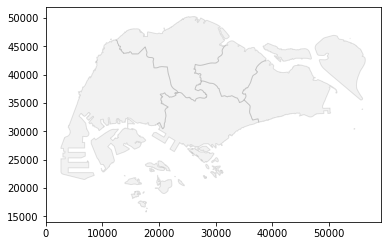

In [3]:
data_dir = "../data"
print(os.listdir(data_dir))

#os.listdir("../data")
region = gpd.read_file("../data/region-2014/MP14_REGION_WEB_PL.shp")
region.plot(color="grey", edgecolor="k", alpha=0.1)

In [4]:
with open(os.path.join("../data", 'subzone_centroid_pos.json'), 'r') as fread:
    pos = json.load(fread)
pos["MARINA SOUTH"]

[31595.83574613999, 29220.18737674884]

data

In [5]:
day = "weekday" # "weekend"
fp = os.path.join(data_dir, "net_202001_{}.net".format(day))
dg1 = nx.read_pajek(fp)
dg1.number_of_nodes(), dg1.number_of_edges()

(303, 30043)

In [11]:
dg1 = nx.DiGraph(dg1)
dg1.number_of_nodes(), dg1.number_of_edges()

(303, 30043)

In [13]:
for u,v,d in dg1.edges(data=True):
    print(d)
    break

{'weight': 272160.0}


In [6]:
day = "weekend"
fp2 = os.path.join(data_dir, "net_202001_{}.net".format(day))
dg2 = nx.read_pajek(fp2)
dg2.number_of_nodes(), dg2.number_of_edges()

(303, 30043)

In [14]:
dg2 = nx.DiGraph(dg2)
dg2.number_of_nodes(), dg2.number_of_edges()

(303, 30043)

In [20]:
h1, a1 = nx.hits(dg1, max_iter=1000, tol=1e-08,)
h2, a2 = nx.hits(dg2, max_iter=1000, tol=1e-08,)

In [21]:

node_stats_1 = {"in_degree": dict(dg1.in_degree(weight="weight")), 
              "out_degree": dict(dg1.out_degree(weight="weight")), 
              "PageRank": nx.pagerank(dg1, weight="weight"), 
              "HITS_hub": h1, 
              "HITS_authority": a1
             }
df_stats_1 = pd.DataFrame.from_dict(node_stats_1)
df_stats_1.head()

,in_degree,out_degree,PageRank,HITS_hub,HITS_authority
ADMIRALTY,3001700.0,2277885.0,0.002484,0.000819,0.000650
AIRPORT ROAD,463360.0,428300.0,0.000739,0.000445,0.000280
ALEXANDRA HILL,7956700.0,6582233.0,0.005698,0.000426,0.000518
ALEXANDRA NORTH,628620.0,954280.0,0.000878,0.000056,0.000026
ALJUNIED,20250634.0,18894418.0,0.011401,0.011760,0.013467


In [22]:

node_stats_2 = {"in_degree": dict(dg2.in_degree(weight="weight")), 
              "out_degree": dict(dg2.out_degree(weight="weight")), 
              "PageRank": nx.pagerank(dg2, weight="weight"), 
              "HITS_hub": h2, 
              "HITS_authority": a2
             }
df_stats_2 = pd.DataFrame.from_dict(node_stats_2)
df_stats_2.head()

,in_degree,out_degree,PageRank,HITS_hub,HITS_authority
ADMIRALTY,1273000.0,947890.0,0.002648,0.001322,0.001210
AIRPORT ROAD,26560.0,24980.0,0.000537,0.000053,0.000034
ALEXANDRA HILL,2725460.0,2034360.0,0.005547,0.000634,0.000833
ALEXANDRA NORTH,154940.0,192740.0,0.000763,0.000053,0.000035
ALJUNIED,8329963.0,7877094.0,0.012875,0.014026,0.017055


Text(0, 0.5, 'out_degree')

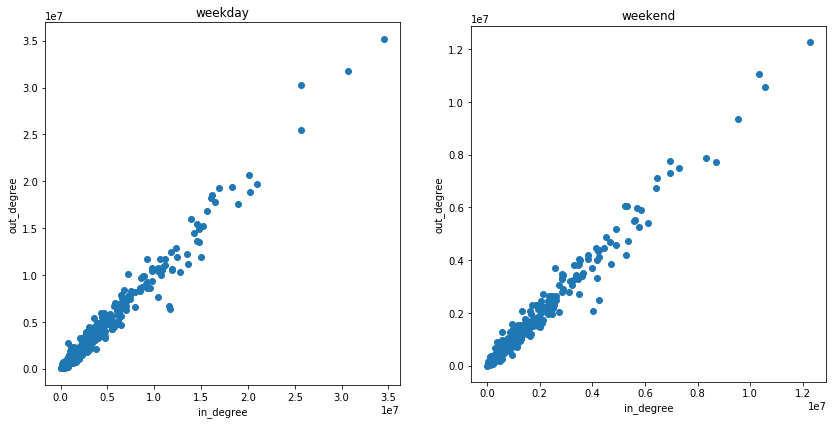

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), sharex=False, sharey=False)
axs[0].scatter(df_stats_1["in_degree"], df_stats_1["out_degree"])
axs[0].set_aspect("equal")
axs[0].set_title("weekday")
axs[0].set_xlabel("in_degree")
axs[0].set_ylabel("out_degree")

axs[1].scatter(df_stats_2["in_degree"], df_stats_2["out_degree"])
axs[1].set_aspect("equal")
axs[1].set_title("weekend")
axs[1].set_xlabel("in_degree")
axs[1].set_ylabel("out_degree")

Text(0, 0.5, 'PageRank')

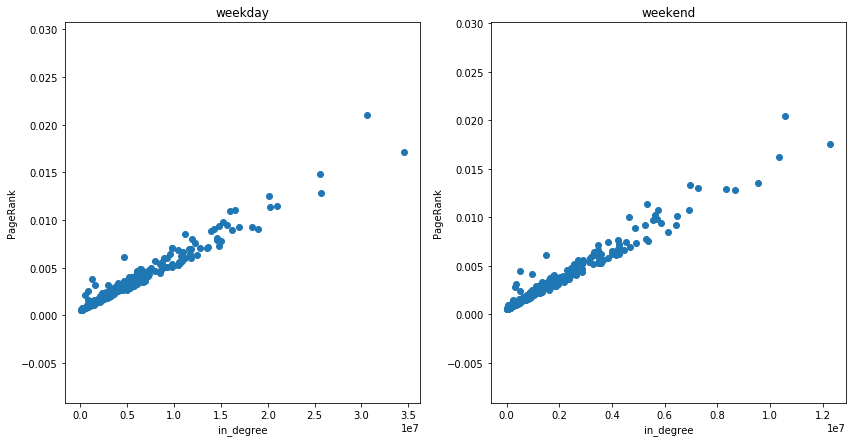

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), sharex=False, sharey=False)
axs[0].scatter(df_stats_1["in_degree"], df_stats_1["PageRank"])
#axs[0].set_aspect("equal")
axs[0].set_title("weekday")
axs[0].set_xlabel("in_degree")
axs[0].set_ylabel("PageRank")

axs[1].scatter(df_stats_2["in_degree"], df_stats_2["PageRank"])
#axs[1].set_aspect("equal")
axs[1].set_title("weekend")
axs[1].set_xlabel("in_degree")
axs[1].set_ylabel("PageRank")

Text(0, 0.5, 'HITS_authority')

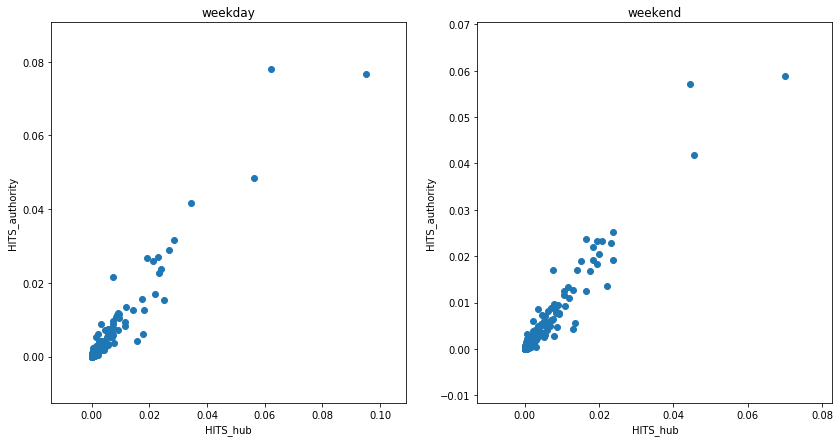

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), sharex=False, sharey=False)
axs[0].scatter(df_stats_1["HITS_hub"], df_stats_1["HITS_authority"])
#axs[0].set_aspect("equal")
axs[0].set_title("weekday")
axs[0].set_xlabel("HITS_hub")
axs[0].set_ylabel("HITS_authority")

axs[1].scatter(df_stats_2["HITS_hub"], df_stats_2["HITS_authority"])
#axs[1].set_aspect("equal")
axs[1].set_title("weekend")
axs[1].set_xlabel("HITS_hub")
axs[1].set_ylabel("HITS_authority")

Text(0, 0.5, 'HITS_authority')

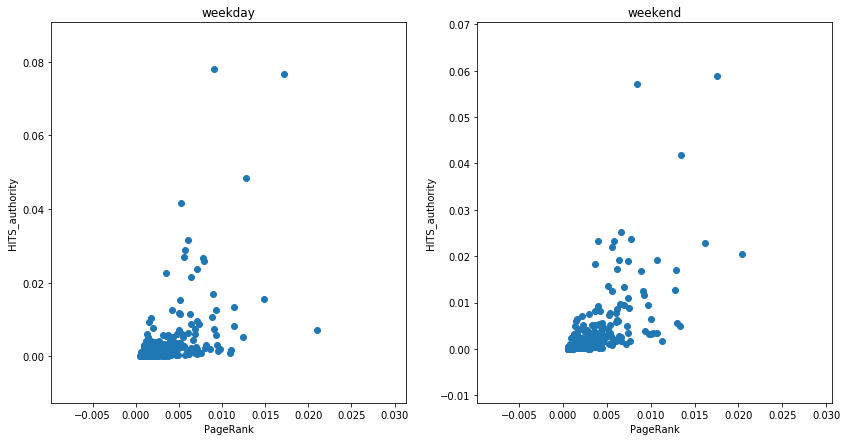

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), sharex=False, sharey=False)
axs[0].scatter(df_stats_1["PageRank"], df_stats_1["HITS_authority"])
#axs[0].set_aspect("equal")
axs[0].set_title("weekday")
axs[0].set_xlabel("PageRank")
axs[0].set_ylabel("HITS_authority")

axs[1].scatter(df_stats_2["PageRank"], df_stats_2["HITS_authority"])
#axs[1].set_aspect("equal")
axs[1].set_title("weekend")
axs[1].set_xlabel("PageRank")
axs[1].set_ylabel("HITS_authority")

Text(0, 0.5, 'HITS_hub')

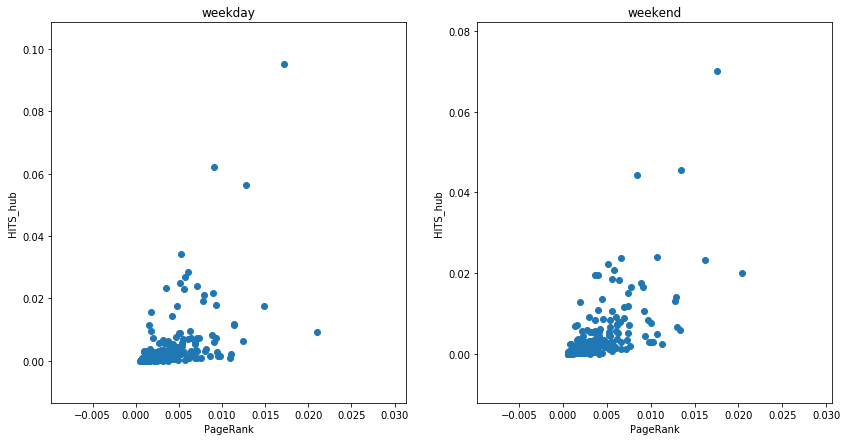

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), sharex=False, sharey=False)
axs[0].scatter(df_stats_1["PageRank"], df_stats_1["HITS_hub"])
#axs[0].set_aspect("equal")
axs[0].set_title("weekday")
axs[0].set_xlabel("PageRank")
axs[0].set_ylabel("HITS_hub")

axs[1].scatter(df_stats_2["PageRank"], df_stats_2["HITS_hub"])
#axs[1].set_aspect("equal")
axs[1].set_title("weekend")
axs[1].set_xlabel("PageRank")
axs[1].set_ylabel("HITS_hub")

Text(0, 0.5, 'HITS_authority')

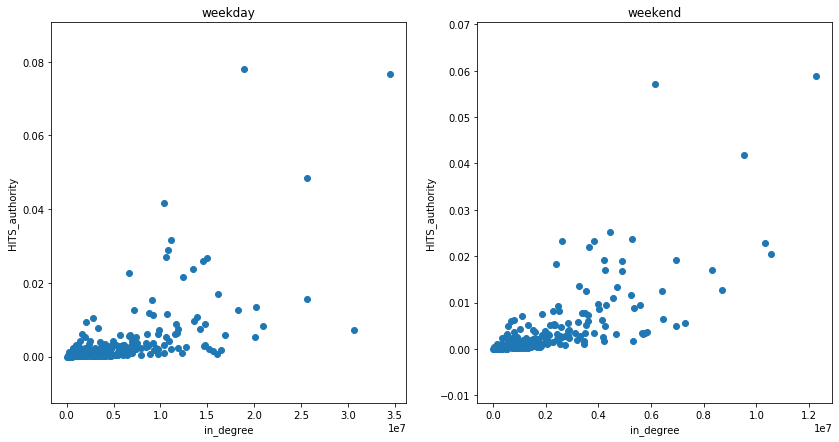

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), sharex=False, sharey=False)
axs[0].scatter(df_stats_1["in_degree"], df_stats_1["HITS_authority"])
#axs[0].set_aspect("equal")
axs[0].set_title("weekday")
axs[0].set_xlabel("in_degree")
axs[0].set_ylabel("HITS_authority")

axs[1].scatter(df_stats_2["in_degree"], df_stats_2["HITS_authority"])
#axs[1].set_aspect("equal")
axs[1].set_title("weekend")
axs[1].set_xlabel("in_degree")
axs[1].set_ylabel("HITS_authority")

Text(0, 0.5, 'HITS_hub')

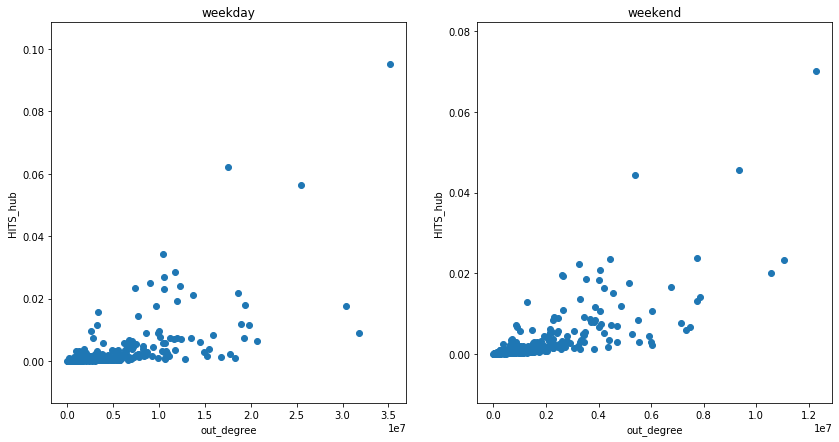

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), sharex=False, sharey=False)
axs[0].scatter(df_stats_1["out_degree"], df_stats_1["HITS_hub"])
#axs[0].set_aspect("equal")
axs[0].set_title("weekday")
axs[0].set_xlabel("out_degree")
axs[0].set_ylabel("HITS_hub")

axs[1].scatter(df_stats_2["out_degree"], df_stats_2["HITS_hub"])
#axs[1].set_aspect("equal")
axs[1].set_title("weekend")
axs[1].set_xlabel("out_degree")
axs[1].set_ylabel("HITS_hub")

In [39]:
df_stats_1.head()

,in_degree,out_degree,PageRank,HITS_hub,HITS_authority
ADMIRALTY,3001700.0,2277885.0,0.002484,0.000819,0.000650
AIRPORT ROAD,463360.0,428300.0,0.000739,0.000445,0.000280
ALEXANDRA HILL,7956700.0,6582233.0,0.005698,0.000426,0.000518
ALEXANDRA NORTH,628620.0,954280.0,0.000878,0.000056,0.000026
ALJUNIED,20250634.0,18894418.0,0.011401,0.011760,0.013467


In [40]:
df_stats_2.head()

,in_degree,out_degree,PageRank,HITS_hub,HITS_authority
ADMIRALTY,1273000.0,947890.0,0.002648,0.001322,0.001210
AIRPORT ROAD,26560.0,24980.0,0.000537,0.000053,0.000034
ALEXANDRA HILL,2725460.0,2034360.0,0.005547,0.000634,0.000833
ALEXANDRA NORTH,154940.0,192740.0,0.000763,0.000053,0.000035
ALJUNIED,8329963.0,7877094.0,0.012875,0.014026,0.017055


In [44]:
df_stat = pd.merge(df_stats_1, df_stats_2, left_index=True, right_index=True, suffixes=("_weekday", "_weekend"), how="outer")
df_stat.head()

,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
ADMIRALTY,3001700.0,2277885.0,0.002484,0.000819,0.000650,1273000.0,947890.0,0.002648,0.001322,0.001210
AIRPORT ROAD,463360.0,428300.0,0.000739,0.000445,0.000280,26560.0,24980.0,0.000537,0.000053,0.000034
ALEXANDRA HILL,7956700.0,6582233.0,0.005698,0.000426,0.000518,2725460.0,2034360.0,0.005547,0.000634,0.000833
ALEXANDRA NORTH,628620.0,954280.0,0.000878,0.000056,0.000026,154940.0,192740.0,0.000763,0.000053,0.000035
ALJUNIED,20250634.0,18894418.0,0.011401,0.011760,0.013467,8329963.0,7877094.0,0.012875,0.014026,0.017055


In [45]:
df_stat.to_csv("node_density_stat.csv", index_label="node")

In [56]:
df_stat = pd.read_csv("node_density_stat.csv", index_col=0)
df_stat.head()

,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
node,,,,,,,,,,
ADMIRALTY,3001700.0,2277885.0,0.002484,0.000819,0.000650,1273000.0,947890.0,0.002648,0.001322,0.001210
AIRPORT ROAD,463360.0,428300.0,0.000739,0.000445,0.000280,26560.0,24980.0,0.000537,0.000053,0.000034
ALEXANDRA HILL,7956700.0,6582233.0,0.005698,0.000426,0.000518,2725460.0,2034360.0,0.005547,0.000634,0.000833
ALEXANDRA NORTH,628620.0,954280.0,0.000878,0.000056,0.000026,154940.0,192740.0,0.000763,0.000053,0.000035
ALJUNIED,20250634.0,18894418.0,0.011401,0.011760,0.013467,8329963.0,7877094.0,0.012875,0.014026,0.017055


In [57]:
[ col for col in df_stat.columns if "in_degree" in col ]

['in_degree_weekday', 'in_degree_weekend']

In [58]:
compare_cols = [ col for col in df_stat.columns if "in_degree" in col ]
df_stat[compare_cols].corr()

,in_degree_weekday,in_degree_weekend
in_degree_weekday,1.000000,0.986536
in_degree_weekend,0.986536,1.000000


In [59]:
compare_cols = [ col for col in df_stat.columns if "out_degree" in col ]
df_stat[compare_cols].corr()

,out_degree_weekday,out_degree_weekend
out_degree_weekday,1.000000,0.985768
out_degree_weekend,0.985768,1.000000


In [60]:
compare_cols = [ col for col in df_stat.columns if "PageRank" in col ]
df_stat[compare_cols].corr()

,PageRank_weekday,PageRank_weekend
PageRank_weekday,1.000000,0.987536
PageRank_weekend,0.987536,1.000000


In [61]:
compare_cols = [ col for col in df_stat.columns if "HITS_hub" in col ]
df_stat[compare_cols].corr()

,HITS_hub_weekday,HITS_hub_weekend
HITS_hub_weekday,1.00000,0.96608
HITS_hub_weekend,0.96608,1.00000


In [62]:
compare_cols = [ col for col in df_stat.columns if "HITS_authority" in col ]
df_stat[compare_cols].corr()

,HITS_authority_weekday,HITS_authority_weekend
HITS_authority_weekday,1.000000,0.964183
HITS_authority_weekend,0.964183,1.000000


In [63]:
compare_cols = [ col for col in df_stat.columns if "weekday" in col ]
df_stat[compare_cols].corr()

,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday
in_degree_weekday,1.000000,0.984697,0.979720,0.645554,0.628103
out_degree_weekday,0.984697,1.000000,0.970438,0.635625,0.604721
PageRank_weekday,0.979720,0.970438,1.000000,0.550648,0.530187
HITS_hub_weekday,0.645554,0.635625,0.550648,1.000000,0.962544
HITS_authority_weekday,0.628103,0.604721,0.530187,0.962544,1.000000


In [64]:
compare_cols = [ col for col in df_stat.columns if "weekend" in col ]
df_stat[compare_cols].corr()

,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
in_degree_weekend,1.000000,0.986388,0.980104,0.740749,0.732393
out_degree_weekend,0.986388,1.000000,0.971501,0.736651,0.711946
PageRank_weekend,0.980104,0.971501,1.000000,0.663482,0.651873
HITS_hub_weekend,0.740749,0.736651,0.663482,1.000000,0.966559
HITS_authority_weekend,0.732393,0.711946,0.651873,0.966559,1.000000


In [65]:
df_stat = pd.read_csv("node_density_stat.csv", index_col=0)
df_stat.head()

,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
node,,,,,,,,,,
ADMIRALTY,3001700.0,2277885.0,0.002484,0.000819,0.000650,1273000.0,947890.0,0.002648,0.001322,0.001210
AIRPORT ROAD,463360.0,428300.0,0.000739,0.000445,0.000280,26560.0,24980.0,0.000537,0.000053,0.000034
ALEXANDRA HILL,7956700.0,6582233.0,0.005698,0.000426,0.000518,2725460.0,2034360.0,0.005547,0.000634,0.000833
ALEXANDRA NORTH,628620.0,954280.0,0.000878,0.000056,0.000026,154940.0,192740.0,0.000763,0.000053,0.000035
ALJUNIED,20250634.0,18894418.0,0.011401,0.011760,0.013467,8329963.0,7877094.0,0.012875,0.014026,0.017055


In [66]:
df_stat.describe()

,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
count,3.030000e+02,3.030000e+02,303.000000,303.000000,303.000000,3.030000e+02,3.030000e+02,303.000000,3.030000e+02,303.000000
mean,4.919505e+06,4.919505e+06,0.003300,0.003300,0.003300,1.728966e+06,1.728966e+06,0.003300,3.300330e-03,0.003300
std,5.189426e+06,5.317314e+06,0.002831,0.008671,0.008492,1.941523e+06,1.950922e+06,0.003010,6.928173e-03,0.006881
min,7.188000e+04,2.412000e+04,0.000535,0.000002,0.000001,2.068000e+04,9.800000e+02,0.000531,6.153787e-08,0.000003
25%,1.377911e+06,1.336489e+06,0.001409,0.000240,0.000262,3.933600e+05,3.971450e+05,0.001236,2.794408e-04,0.000290
50%,3.270440e+06,3.313336e+06,0.002517,0.000712,0.000705,1.089820e+06,1.096853e+06,0.002426,9.326672e-04,0.000915
75%,6.480206e+06,6.561792e+06,0.004237,0.002433,0.002522,2.303940e+06,2.271374e+06,0.004054,2.944687e-03,0.002917
max,3.452935e+07,3.519080e+07,0.021033,0.095078,0.078104,1.227194e+07,1.228410e+07,0.020416,7.004667e-02,0.058811


In [68]:
df_stat["in_degree_weekday"].min()

71880.0

In [69]:
df_stat2 = df_stat.copy()
for col in df_stat.columns:
    scale = df_stat[col].max() - df_stat[col].min()
    df_stat2[col] = (df_stat[col] - df_stat[col].min()) / scale
df_stat2.head()

,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
node,,,,,,,,,,
ADMIRALTY,0.085027,0.064088,0.095081,0.008601,0.008298,0.102220,0.077090,0.106444,0.018868,0.020532
AIRPORT ROAD,0.011361,0.011493,0.009982,0.004666,0.003565,0.000480,0.001954,0.000290,0.000752,0.000519
ALEXANDRA HILL,0.228828,0.186487,0.251906,0.004467,0.006607,0.220776,0.165543,0.252229,0.009051,0.014105
ALEXANDRA NORTH,0.016157,0.026450,0.016741,0.000569,0.000313,0.010959,0.015612,0.011660,0.000763,0.000551
ALJUNIED,0.585613,0.536596,0.530093,0.123671,0.172411,0.678239,0.641214,0.620737,0.200231,0.289960


In [70]:
df_stat2.describe()

,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.140684,0.139205,0.134924,0.034695,0.042238,0.139438,0.140680,0.139245,0.047115,0.056069
std,0.150604,0.151203,0.138126,0.091200,0.108728,0.158475,0.158830,0.151360,0.098908,0.117015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.037903,0.037319,0.042655,0.002503,0.003331,0.030420,0.032253,0.035442,0.003988,0.004880
50%,0.092826,0.093532,0.096708,0.007469,0.009004,0.087268,0.089218,0.095276,0.013314,0.015502
75%,0.185978,0.185905,0.180633,0.025576,0.032271,0.186369,0.184839,0.177152,0.042038,0.049548
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
df_stat2.to_csv("node_density_stat_normalized.csv", index_label="node")